In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
public_spending = 'public_spending.csv'
inflation = 'https://raw.githubusercontent.com/hrezende/Group-54/master/inflation_monthly.csv'
approval = 'https://raw.githubusercontent.com/agoebel8990/Group-54/master/ApprovalDataTo1989.csv'

In [156]:
df_PS = pd.read_csv(public_spending)
df_PS.rename(columns={'B087RC1Q027SBEA': 'Billions_Dollars', 'DATE': 'Date'}, inplace = True)

In [157]:
df_I = pd.read_csv(inflation)
df_I.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_I = df_I.fillna(0)
df_I = df_I.astype({'Date':int})
df_I['Jan'] = df_I['Jan'].str[:-1].astype(float)
df_I['Apr'] = df_I['Apr'].str[:-1].astype(float)
df_I['Jul'] = df_I['Jul'].str[:-1].astype(float)
df_I['Oct'] = df_I['Oct'].str[:-1].astype(float)
df_I = df_I.dropna()

In [158]:
df_A = pd.read_csv(approval)

In [159]:
dictionary_dates = {}
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Jan']
    dates = {(str(df_I.loc[i, 'Date']) + '-01-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Apr']
    dates = {(str(df_I.loc[i, 'Date']) + '-04-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Jul']
    dates = {(str(df_I.loc[i, 'Date']) + '-07-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Oct']
    dates = {(str(df_I.loc[i, 'Date']) + '-10-01'):i_rate}
    dictionary_dates.update(dates)

In [160]:
inflation_rates = []
for i, row in df_PS.iterrows():

    dates = df_PS.loc[i, 'Date']
    inflation_rates.append(dictionary_dates[dates])

df_PS['Inflation_Rate'] = inflation_rates

In [161]:
inflation_adjusted = []

for i, row in df_PS.iterrows(): 
    if (i == 0):
        percent = 1-((df_PS.loc[i, 'Inflation_Rate'])/100)
        inflation_adjusted.append(percent)
    else:
        percent = 1-((df_PS.loc[i, 'Inflation_Rate'])/100)
        adjusted = percent * inflation_adjusted[i-1]
        inflation_adjusted.append(adjusted)
    
df_PS['Inflation_Adjusted'] = inflation_adjusted

In [163]:
adjusted_sales = []

for i, row in df_PS.iterrows(): 
    if (i == 0):
        sales = df_PS.loc[i, 'Billions_Dollars']
        adjusted_sales.append(sales)
    elif (i == 339):
        continue
    else:
        sales = df_PS.loc[i, 'Billions_Dollars']
        percent = (df_PS.loc[i-1, 'Inflation_Adjusted'])
        adjusted = sales * percent
        adjusted_sales.append(adjusted)

df_PS['Adjusted_Sales'] = adjusted_sales

Text(0.5, 1.0, 'Public Spending in Billions of Dollars (1992-2020)')

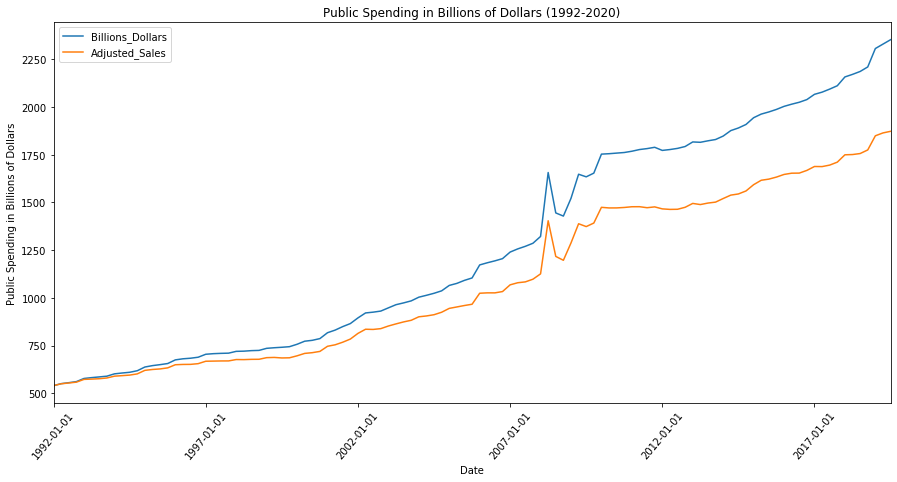

In [164]:
fig = df_PS.plot.line(x='Date',y=['Billions_Dollars', 'Adjusted_Sales'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Public Spending in Billions of Dollars')
fig.set_title('Public Spending in Billions of Dollars (1992-2020)')

In [165]:
df_A['Month_Only'] = df_A['End Date'].str[:7]
df_PS['Month_Only'] = df_PS['Date'].str[:7]

In [166]:
df = df_PS.join(df_A.set_index('Month_Only'), on='Month_Only')

Text(0.5, 1.0, 'Presidential Approval Rating and Gov Public Spending Correlation (1992-2020)')

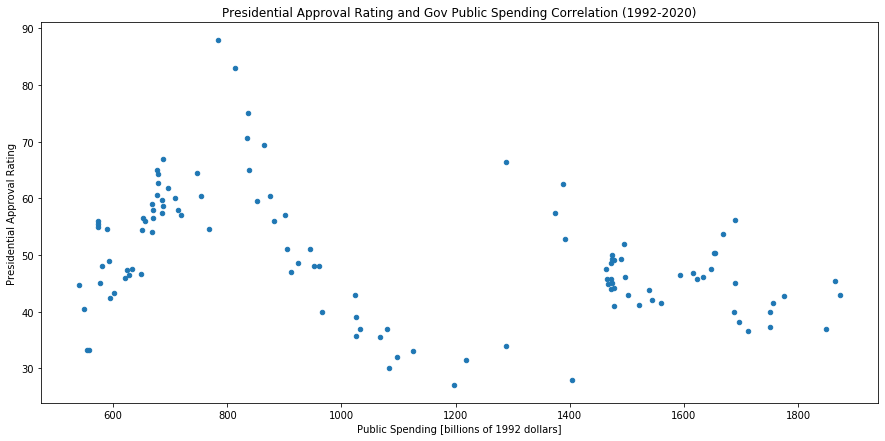

In [102]:
fig = df.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1992-2020)')

Text(0.5, 1.0, 'Presidential Disapproval Rating and Gov Public Spending Correlation (1992-2020)')

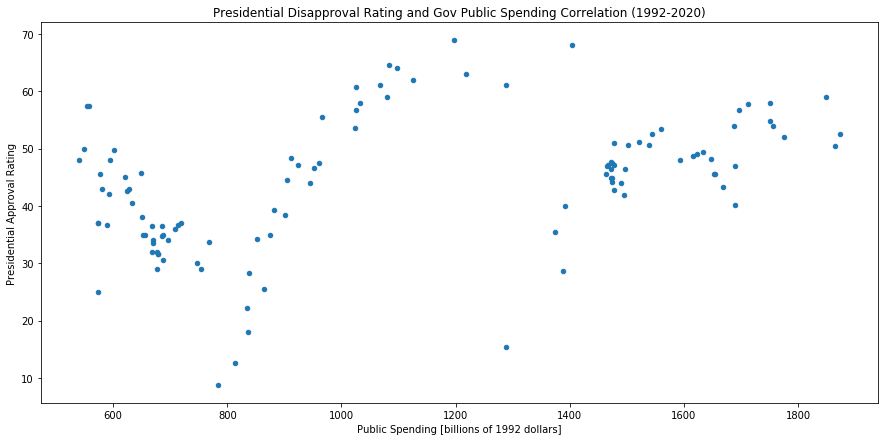

In [100]:
fig = df.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating')
fig.set_title('Presidential Disapproval Rating and Gov Public Spending Correlation (1992-2020)')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


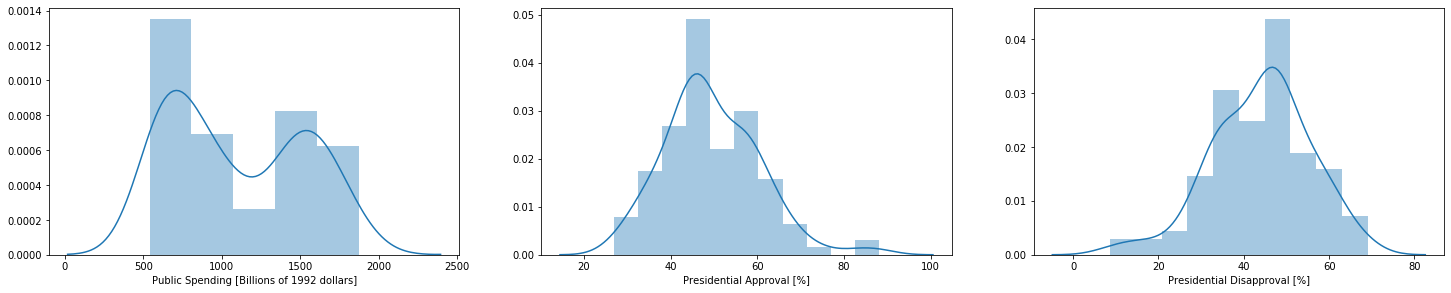

In [103]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

In [104]:
outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df)

mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.07e-05
Time:                        03:44:16   Log-Likelihood:                -424.80
No. Observations:                 114   AIC:                             853.6
Df Residuals:                     112   BIC:                             859.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         60.4792      2.642     22.

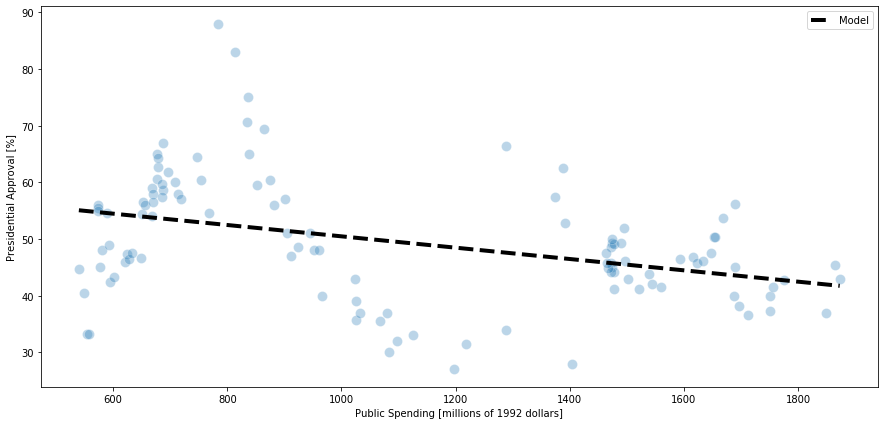

In [105]:
plt.figure(figsize=(15, 7))


sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df, s=100)


xs = np.arange(df['Adjusted_Sales'].min(), df['Adjusted_Sales'].max())
ys = -0.0100  * xs + 60.4798
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

**This gave us some answers, but to dig deeper, we have to separate the data by each administration** 

Different presidents face different problems and economic conditions during their time as president. Different presidents also have differing levels of popularity. Completing these same analyses for each president individually may give us a clearer picture.

In [142]:
df_Clinton = df[df['President'] == 'Clinton']
df_Bush = df[df['President'] == 'GW Bush']
df_Obama= df[df['President'] == 'Obama']
df_Trump = df[df['President'] == 'Trump']

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     32.74
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           2.71e-06
Time:                        04:28:45   Log-Likelihood:                -97.724
No. Observations:                  33   AIC:                             199.4
Df Residuals:                      31   BIC:                             202.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -12.9392     11.920     -1.

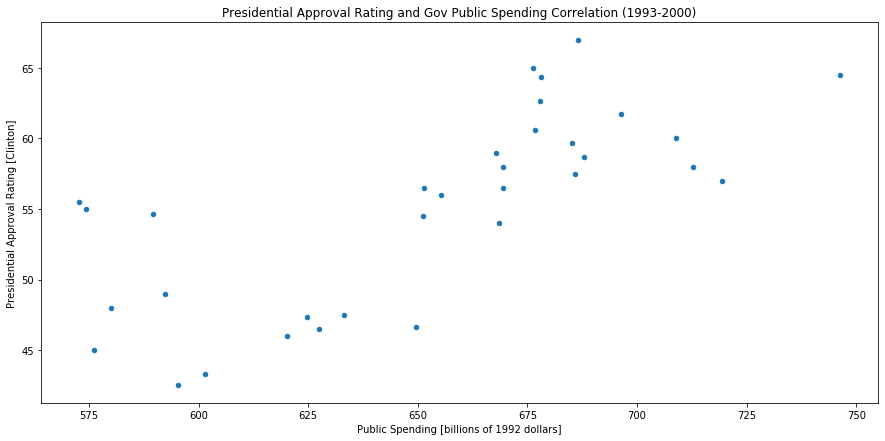

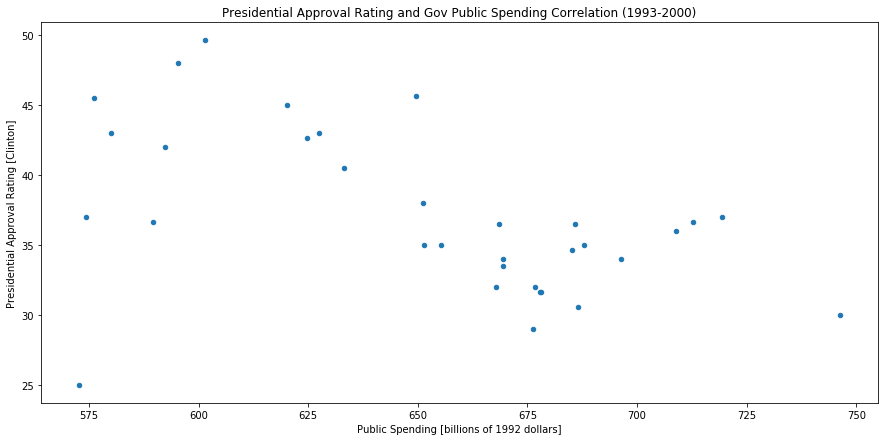

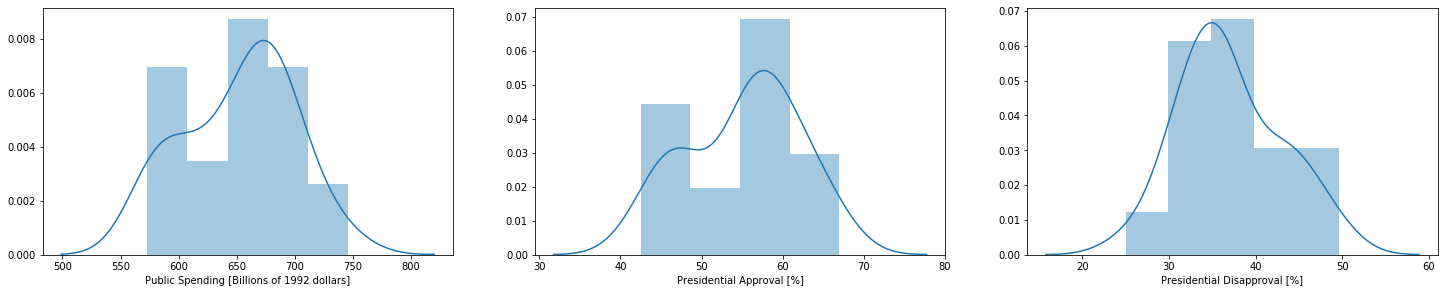

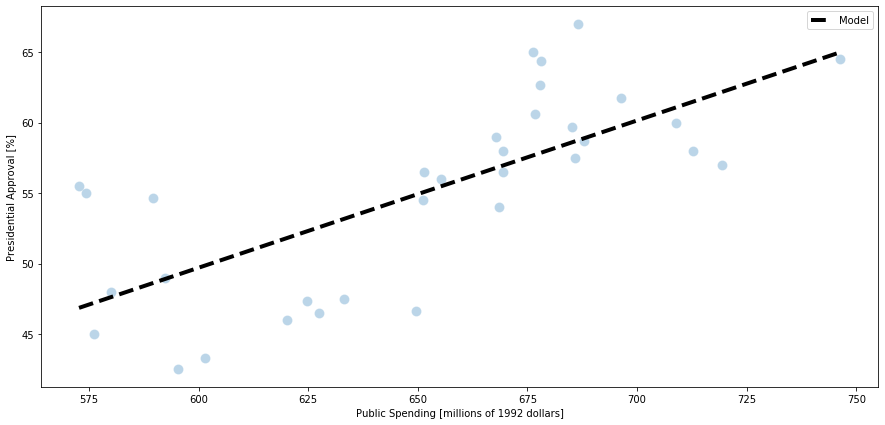

In [167]:
#scatter plot for approval ratings

fig = df_Clinton.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Clinton]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1993-2000)')

#scatter plot for disapproval ratings

fig = df_Clinton.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Clinton]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1993-2000)')

#scatter plot for approval ratings

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Clinton['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Clinton['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Clinton['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Clinton)

mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Clinton, s=100)

xs = np.arange(df_Clinton['Adjusted_Sales'].min(), df_Clinton['Adjusted_Sales'].max())
ys = .1044  * xs - 12.9392
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     68.61
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           3.02e-09
Time:                        04:31:20   Log-Likelihood:                -115.22
No. Observations:                  32   AIC:                             234.4
Df Residuals:                      30   BIC:                             237.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        134.8418     10.460     12.

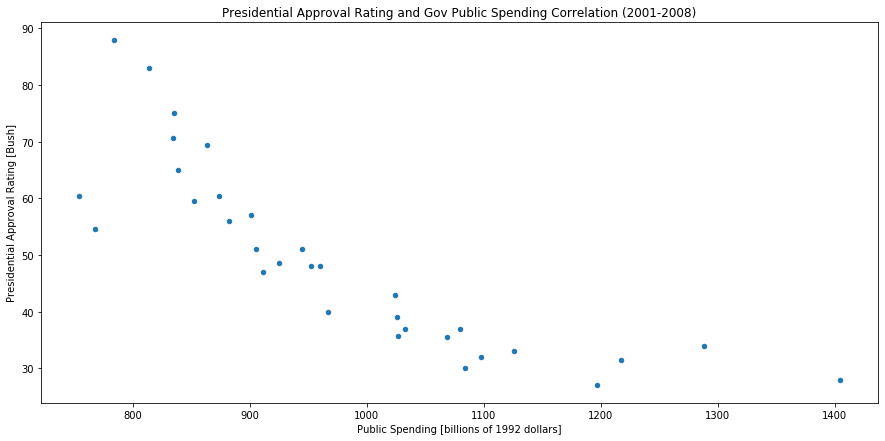

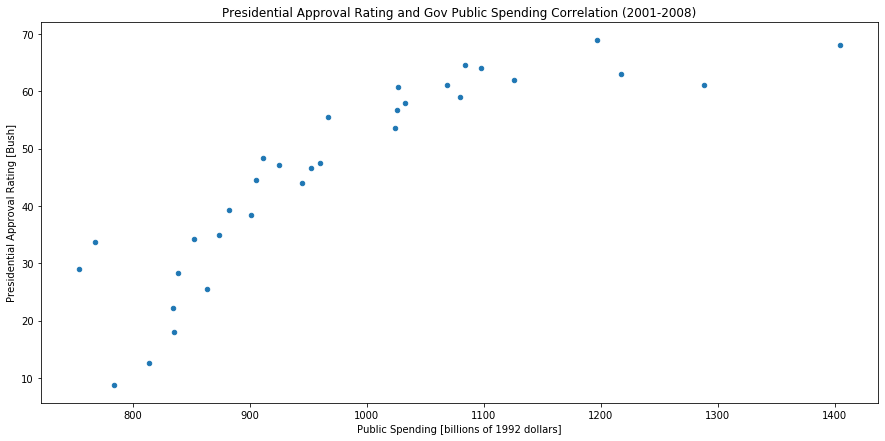

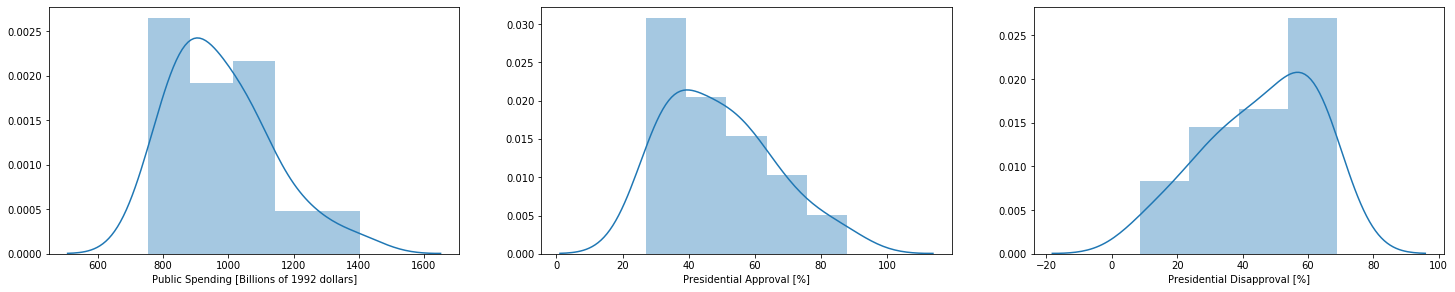

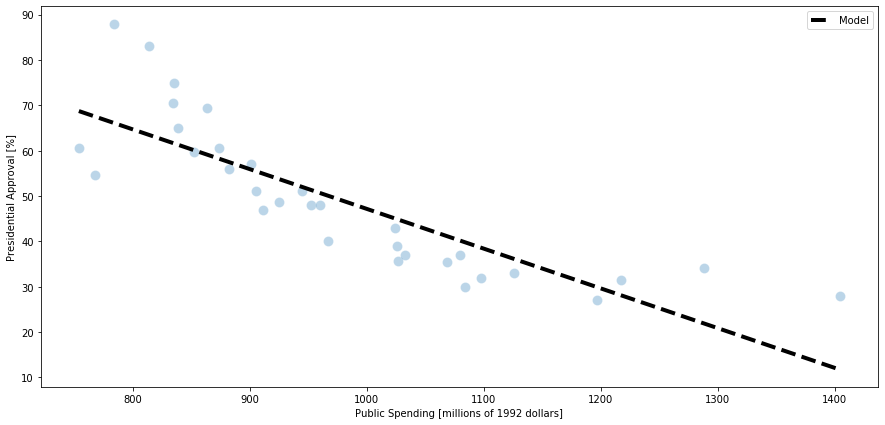

In [169]:
#scatter plot for approval ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Bush]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2001-2008)')

#scatter plot for disapproval ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Bush]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2001-2008)')

#scatter plot for disapproval ratings

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Bush['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Bush['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Bush['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Bush)

mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Bush, s=100)

xs = np.arange(df_Bush['Adjusted_Sales'].min(), df_Bush['Adjusted_Sales'].max())
ys = -.0877  * xs + 134.8418
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.440
Date:                Sat, 06 Jun 2020   Prob (F-statistic):             0.0732
Time:                        04:32:34   Log-Likelihood:                -102.70
No. Observations:                  33   AIC:                             209.4
Df Residuals:                      31   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         78.1168     16.061      4.

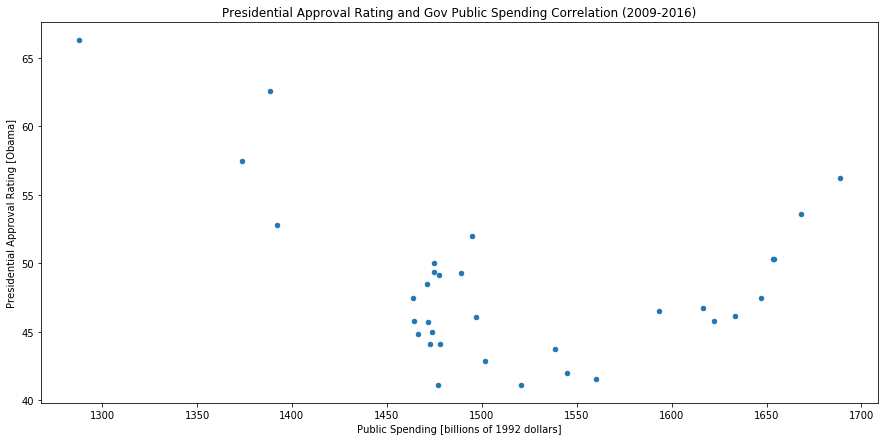

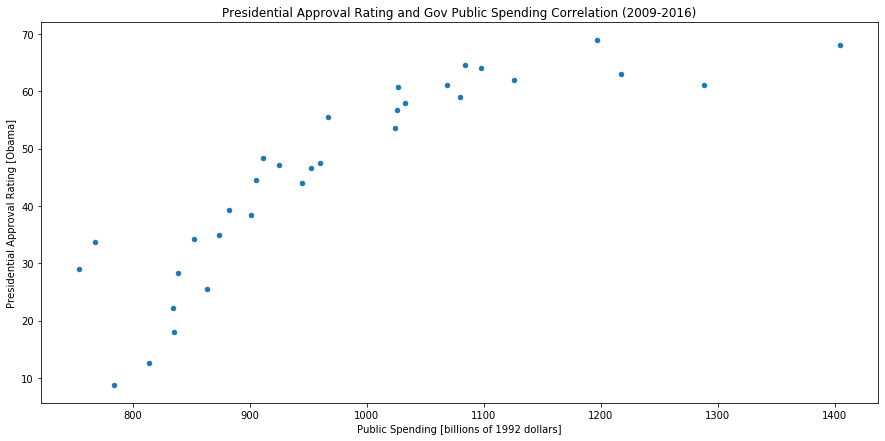

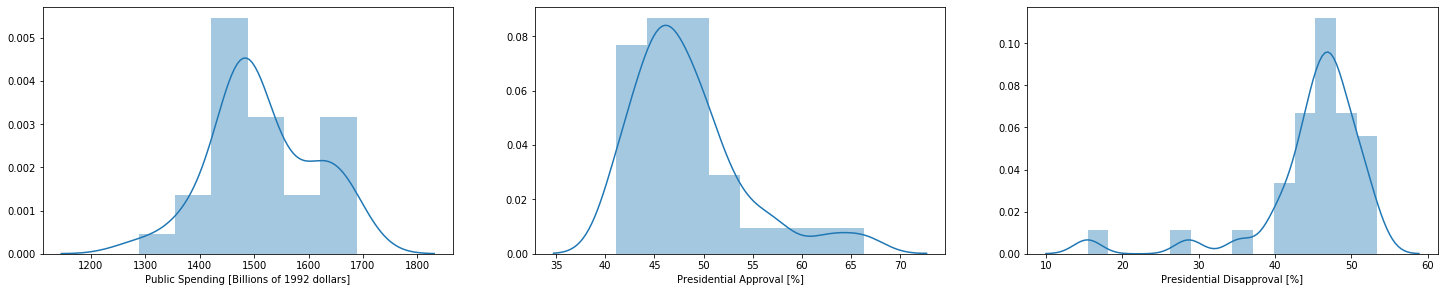

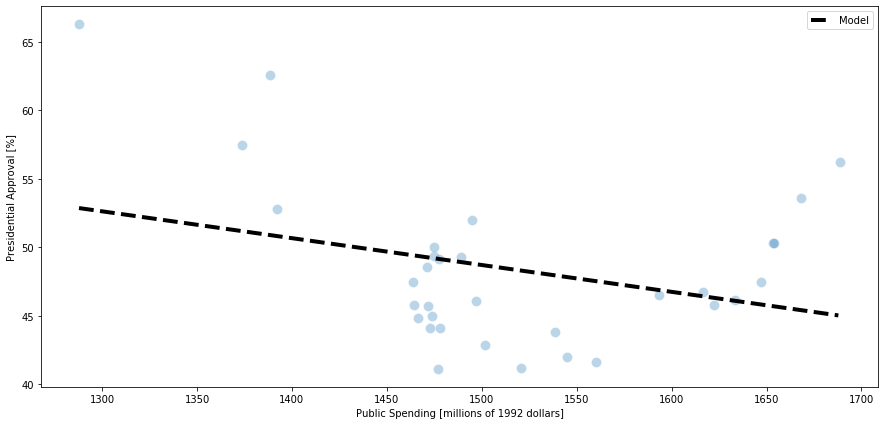

In [171]:
#scatter plot for approval ratings

fig = df_Obama.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Obama]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2009-2016)')

#scatter plot for disapproval ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Obama]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2009-2016)')

#scatter plot for disapproval ratings

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Obama['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Obama['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Obama['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Obama)

mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Obama, s=100)

xs = np.arange(df_Obama['Adjusted_Sales'].min(), df_Obama['Adjusted_Sales'].max())
ys = -.0196  * xs + 78.1168
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.7219
Date:                Sat, 06 Jun 2020   Prob (F-statistic):              0.418
Time:                        04:33:20   Log-Likelihood:                -27.401
No. Observations:                  11   AIC:                             58.80
Df Residuals:                       9   BIC:                             59.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.6917     25.836      0.

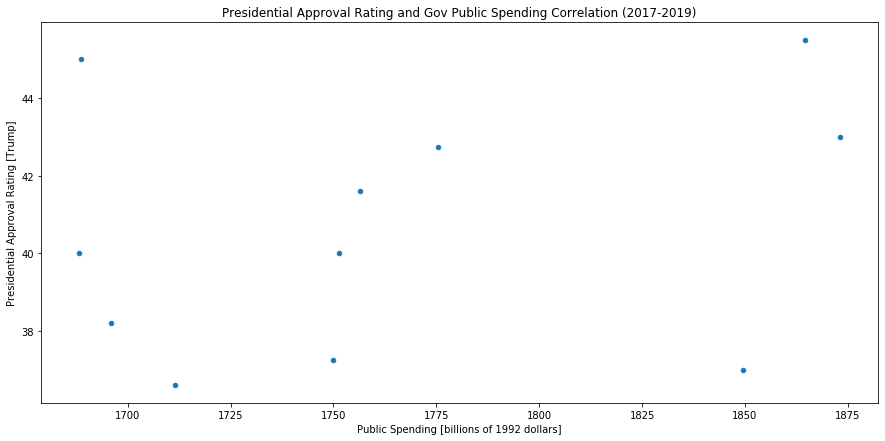

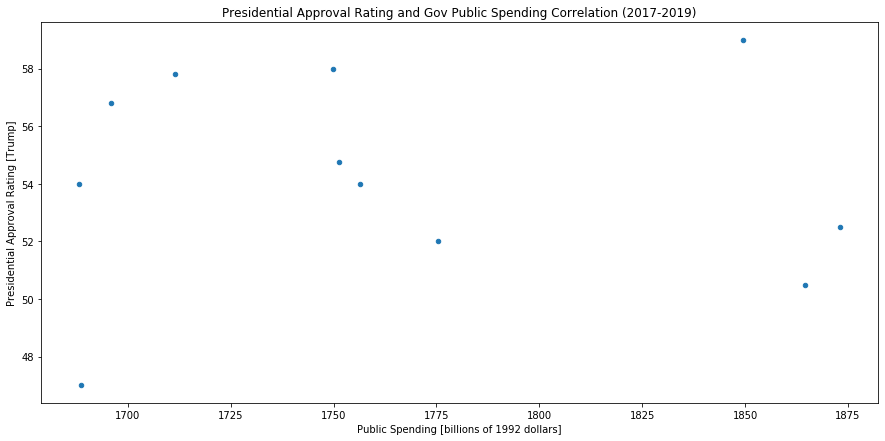

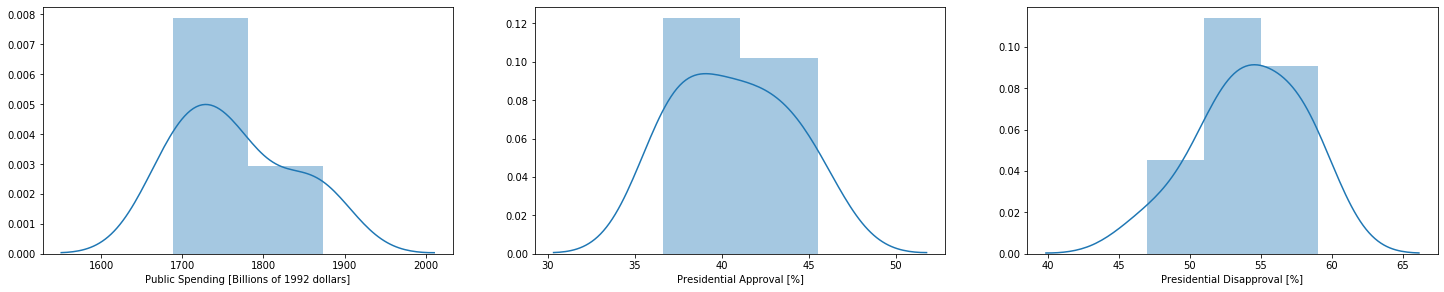

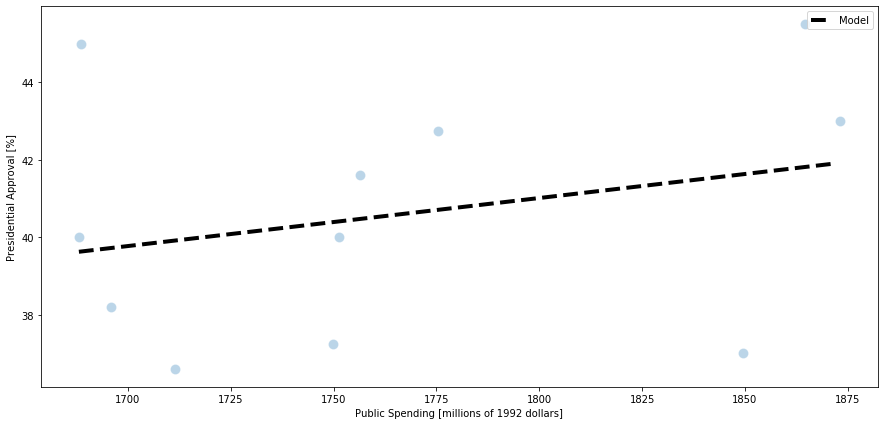

In [172]:
fig = df_Trump.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Trump]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2017-2019)')

fig = df_Trump.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Trump]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2017-2019)')

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Trump['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Trump['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Trump['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Trump)

mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Trump, s=100)

xs = np.arange(df_Trump['Adjusted_Sales'].min(), df_Trump['Adjusted_Sales'].max())
ys = .0124  * xs + 18.6917
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();